<a href="https://colab.research.google.com/github/harikavemula91/harikavemula91/blob/main/Deep_Learning_spam_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x 

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
!wget https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla

--2020-08-07 14:39:39--  https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla [following]
--2020-08-07 14:39:39--  https://www.dropbox.com/sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2abb06ad6647d6d7e4b673cdc8.dl.dropboxusercontent.com/zip_download_get/AgZmiyGhi6Mv6WNWRDuWcUlD60MG3NwXQ4eWqefJJ1GWL6yCB8qLgcFyc2LQmklEc7S06Vw4NW8cSRfEgwWEfCTneC2SP7I_aRyNl7TEs8r2XA [following]
--2020-08-07 14:39:39--  https://uc2abb06ad6647d6d7e4b673cdc8.dl.dropboxusercontent.com/zip_download_get/AgZmiyGhi6Mv6WNWRDuWcUlD60MG3NwXQ4eWqefJJ1GWL6yCB8qLgcFyc2LQmklEc7S06Vw4NW8cSRfEgwWEfCTne

In [ ]:
!unzip AAAw1_JIzpuVvwteJCma0xMla

Archive:  AAAw1_JIzpuVvwteJCma0xMla
mapname:  conversion of  failed
 extracting: train.csv               


In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
train

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


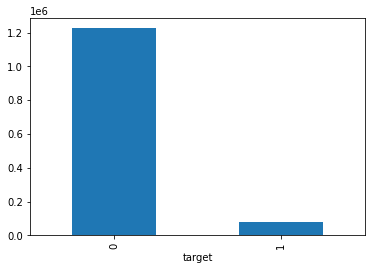

In [ ]:
train.groupby("target")['qid'].count().plot.bar()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [ ]:
train_target=np.array(train['target'])
train['question_text'][1]

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
train.drop(columns=['qid'],inplace=True)

In [ ]:
# download pretrained Glove embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-08-07 14:39:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-08-07 14:39:53--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-08-07 14:39:53--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from __future__ import print_function

import sys
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

In [ ]:
train.head()

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [ ]:
train.question_text

0          How did Quebec nationalists see their province...
1          Do you have an adopted dog, how would you enco...
2          Why does velocity affect time? Does velocity a...
3          How did Otto von Guericke used the Magdeburg h...
4          Can I convert montra helicon D to a mountain b...
                                 ...                        
1306117    What other technical skills do you need as a c...
1306118    Does MS in ECE have good job prospects in USA ...
1306119                            Is foam insulation toxic?
1306120    How can one start a research project based on ...
1306121    Who wins in a battle between a Wolverine and a...
Name: question_text, Length: 1306122, dtype: object

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('glove.6B.zip', 'r')
zip_ref.extractall(".")
zip_ref.close()

In [ ]:
!ls
!pwd

AAAw1_JIzpuVvwteJCma0xMla  glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt	   glove.6B.300d.txt  glove.6B.zip	train.csv
/content


In [ ]:
glove_dir = './'

embeddings_index = {} #initialize dictionary
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

In [ ]:
from string import punctuation 
import re #regular expressions
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
lemma=WordNetLemmatizer()
token=ToktokTokenizer()
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
train['question_text']=train['question_text'].apply(lambda x:re.sub("["+punctuation+"]",' ',x))
train['question_text']=train['question_text'].apply(lambda x:re.sub("\d",' ',x)) # \d is digits
train['question_text']=train['question_text'].apply(lambda x:re.sub("\s+",' ',x)) # \s spaces

In [ ]:
def lemmatizedWords(text):
    words=token.tokenize(text)
    Lemmatized=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        Lemmatized.append(x)
    return ' '.join(map(str, Lemmatized))

In [ ]:
train['question_text']=train['question_text'].apply(lambda x: lemmatizedWords(x))

In [ ]:
def stopWordsRemove(text):
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [ ]:
train['question_text'] = train['question_text'].apply(lambda x: stopWordsRemove(x))

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
text=train['question_text'].tolist()
text
token=Tokenizer()
token.fit_on_texts(text)

In [ ]:
vocab_size=len(token.word_index)+1
vocab_size

noofwords= train['question_text'].apply(lambda x: len(x.split()))
maxlen=max(noofwords)

In [ ]:
tokenizer = Tokenizer(num_words= vocab_size)
tokenizer.fit_on_texts(train['question_text'])

sequences = tokenizer.texts_to_sequences(train['question_text'])
train = pad_sequences(sequences, maxlen)

In [ ]:
train.shape

(1306122, 126)

In [ ]:
#weight matrix
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=126, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 126, 100)          17603500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 17,701,665
Trainable params: 98,165
Non-trainable params: 17,603,500
_____________________________________

In [ ]:
train_target.shape,train.shape

((1306122,), (1306122, 126))

In [ ]:
train_final=np.asarray(train)
train_target_final=np.asarray(train_target).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(train_final, train_target_final, test_size=0.33, random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((875101, 126), (875101,), (431021, 126), (431021,))

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
13674/13674 [==============================] - 1260s 92ms/step - loss: 0.1441 - accuracy: 0.9476 - val_loss: 0.1327 - val_accuracy: 0.9512
Epoch 2/10
13674/13674 [==============================] - 1261s 92ms/step - loss: 0.1351 - accuracy: 0.9500 - val_loss: 0.1297 - val_accuracy: 0.9520
Epoch 3/10
13674/13674 [==============================] - 1256s 92ms/step - loss: 0.1320 - accuracy: 0.9511 - val_loss: 0.1290 - val_accuracy: 0.9524
Epoch 4/10
13674/13674 [==============================] - 1264s 92ms/step - loss: 0.1300 - accuracy: 0.9517 - val_loss: 0.1283 - val_accuracy: 0.9527
Epoch 5/10
13674/13674 [==============================] - 1256s 92ms/step - loss: 0.1288 - accuracy: 0.9521 - val_loss: 0.1282 - val_accuracy: 0.9523
Epoch 6/10
13674/13674 [==============================] - 1260s 92ms/step - loss: 0.1275 - accuracy: 0.9526 - val_loss: 0.1283 - val_accuracy: 0.9524
Epoch 7/10
13674/13674 [==============================] - 1367s 100ms/step - loss: 0.1268 - accuracy

In [ ]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
accuracy_score(y_test,y_pred)

0.9521021017537429

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[397258,   7486],
       [ 13159,  13118]])